### Imports

In [5]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Cleaning the listings file

In [3]:
df = pd.read_csv('/Users/veenakumar/ds/metis/metisgh/sf16_ds4/local/Projects/5Kojak/airbnbdata/sanfrancisco/airbnb_listings_clean.csv',index_col=0)

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Since there are too many columns, doing "df.info()" will not display all the columns, so printing them out to take a look at what we got!  

Also, adding quotes and a comma after every column so it is easy to customize a new df with only fraction of the columns.

In [4]:
for c in df.columns:
    print ("\'" + c +"\',")

'accommodates',
'bathrooms',
'bed_type',
'bedrooms',
'beds',
'calculated_host_listings_count',
'calendar_last_scraped',
'calendar_updated',
'cancellation_policy',
'cleaning_fee',
'description',
'experiences_offered',
'extra_people',
'first_review',
'guests_included',
'has_availability',
'host_about',
'host_acceptance_rate',
'host_has_profile_pic',
'host_id',
'host_identity_verified',
'host_is_superhost',
'host_listings_count',
'host_location',
'host_name',
'host_neighbourhood',
'host_picture_url',
'host_response_rate',
'host_response_time',
'host_since',
'host_thumbnail_url',
'host_total_listings_count',
'host_url',
'host_verifications',
'house_rules',
'id',
'instant_bookable',
'is_location_exact',
'jurisdiction_names',
'last_review',
'last_scraped',
'latitude',
'license',
'listing_url',
'longitude',
'market',
'maximum_nights',
'medium_url',
'minimum_nights',
'monthly_price',
'name',
'neighbourhood_cleansed',
'notes',
'number_of_reviews',
'picture_url',
'price',
'property_type',
'requi

Creating a clean df! Ran through a few iterations as I explored some columns and determined whether they would be helpful or not to my analysis.

In [ ]:
dfclean = df['accommodates','bathrooms','bed_type','bedrooms','beds','calculated_host_listings_count','calendar_last_scraped','calendar_updated',
             'cancellation_policy','cleaning_fee','description','experiences_offered','extra_people','first_review','guests_included','has_availability',
             'host_about','host_acceptance_rate','host_has_profile_pic','host_id','host_identity_verified','host_is_superhost','host_listings_count',
             'host_location','host_name','host_neighbourhood','host_picture_url','host_response_rate','host_response_time','host_since','host_thumbnail_url',
             'host_total_listings_count','host_url','host_verifications','house_rules','id','instant_bookable','is_location_exact','jurisdiction_names',
             'last_review','last_scraped','latitude','license','listing_url','longitude','market','maximum_nights','medium_url',
             'minimum_nights','monthly_price','name','neighbourhood_cleansed','notes','number_of_reviews','picture_url','price','property_type',
             'require_guest_phone_verification','require_guest_profile_picture','requires_license','review_scores_accuracy','review_scores_checkin',
             'review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value','reviews_per_month',
             'room_type','security_deposit','smart_location','space','summary','thumbnail_url','transit','weekly_price','xl_picture_url','zipcode',
             'count_amenities','amen_TV','amen_Cable TV','amen_Internet','amen_Wireless Internet','amen_Kitchen','amen_Buzzer/Wireless Intercom',
             'amen_Heating','amen_Smoke Detector','amen_Carbon Monoxide Detector','amen_Free Parking on Premises','amen_Family/Kid Friendly','amen_Washer',
             'amen_Dryer','amen_First Aid Kit','amen_Fire Extinguisher','amen_Essentials','amen_Shampoo','amen_Indoor Fireplace','amen_Suitable for Events',
             'amen_Gym','amen_Pets live on this property','amen_Dog(s)','amen_Pets Allowed','amen_Cat(s)','amen_Elevator in Building','amen_Safety Card',
             'amen_Air Conditioning','amen_Breakfast','amen_Smoking Allowed','amen_Hot Tub','amen_Wheelchair Accessible','amen_Hangers','amen_Hair Dryer',
             'amen_Iron','amen_Laptop Friendly Workspace','amen_24-Hour Check-in','amen_','amen_Lock on Bedroom Door','amen_Doorman','amen_Other pet(s)','amen_Pool',
             'amen_Washer / Dryer']

In [76]:
dfclean = dfclean[['review_scores_rating','review_scores_value','number_of_reviews','review_scores_accuracy','review_scores_checkin',
                   'review_scores_cleanliness','review_scores_communication','review_scores_location','reviews_per_month','accommodates',
                   'bathrooms','bed_type','bedrooms','beds','calculated_host_listings_count','cancellation_policy','cleaning_fee','host_acceptance_rate',
                   'host_has_profile_pic','host_identity_verified','host_is_superhost','host_listings_count','host_response_rate','host_response_time','host_since',
                   'host_total_listings_count','id','instant_bookable','maximum_nights','minimum_nights','monthly_price','neighbourhood_cleansed','price',
                   'property_type','room_type','security_deposit','weekly_price','zipcode','count_amenities','amen_TV','amen_Cable TV',
                   'amen_Internet','amen_Wireless Internet','amen_Kitchen','amen_Buzzer/Wireless Intercom','amen_Heating','amen_Smoke Detector','amen_Carbon Monoxide Detector',
                   'amen_Free Parking on Premises','amen_Family/Kid Friendly','amen_Washer','amen_Dryer','amen_First Aid Kit','amen_Fire Extinguisher',
                   'amen_Essentials','amen_Shampoo','amen_Indoor Fireplace','amen_Suitable for Events','amen_Gym','amen_Pets live on this property','amen_Dog(s)',
                   'amen_Pets Allowed','amen_Cat(s)','amen_Elevator in Building','amen_Safety Card','amen_Air Conditioning','amen_Breakfast','amen_Smoking Allowed','amen_Hot Tub',
                   'amen_Wheelchair Accessible','amen_Hangers','amen_Hair Dryer','amen_Iron','amen_Laptop Friendly Workspace','amen_24-Hour Check-in',
                   'amen_Lock on Bedroom Door','amen_Doorman','amen_Other pet(s)','amen_Pool','amen_Washer / Dryer','amen_None']]

Cleaning some variables so they are the appropriate data type.

In [67]:
dfclean.host_response_rate = [float(str(c).split('%')[0]) for c in dfclean.host_response_rate]

In [68]:
dfclean.zipcode = dfclean.zipcode.map(str)

In [69]:

for i,c in enumerate(dfclean.weekly_price):
    try:
        dfclean.weekly_price[i] = float(str(c).split('$')[1].replace(',',''))
    except:
        pass
    

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
dfclean.weekly_price = dfclean.weekly_price.map(float)

In [79]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21961 entries, 0 to 21960
Data columns (total 81 columns):
review_scores_rating               15631 non-null float64
review_scores_value                15576 non-null float64
number_of_reviews                  21960 non-null float64
review_scores_accuracy             15572 non-null float64
review_scores_checkin              15574 non-null float64
review_scores_cleanliness          15578 non-null float64
review_scores_communication        15590 non-null float64
review_scores_location             15581 non-null float64
reviews_per_month                  15909 non-null float64
accommodates                       21961 non-null float64
bathrooms                          21841 non-null float64
bed_type                           21961 non-null object
bedrooms                           21931 non-null float64
beds                               21934 non-null float64
calculated_host_listings_count     21961 non-null float64
cancellation_policy   

Now that all the variables are the data type that I want them, I am going to create dummy variables for the non-integar variables.

In [80]:
dfclean = pd.get_dummies(data=dfclean)

Saving this new dataframe so I can import this clean version for future use!

In [81]:
dfclean.to_csv('/Users/veenakumar/ds/metis/metisgh/sf16_ds4/local/Projects/5Kojak/listings_dummies_final.csv')

Since this dataframe is a concatenation of several scrapings, there are duplicate listing id's. Listing id is not a 'feature' that I want to use, therefore I only need the unique listing ids. To do this I am first readding the "last_scraped" column from the original dataframe and sorting the new dataframe first by the id and then the scrape date. Then I am dropping all duplicates from the id column, and only keeping the last duplicate value for each (since the last of every duplicate series is the *most recent* scrape date)

In [83]:
dfclean['scraped'] = df.last_scraped

In [84]:
dfclean.sort_values(['id','scraped'],inplace=True)

In [87]:
dfclean.drop_duplicates('id',keep='last',inplace=True)

In [89]:
dfclean.drop('scraped',inplace=True,axis=1)

In [90]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14137 entries, 8350 to 13306
Columns: 189 entries, review_scores_rating to zipcode_nan
dtypes: float64(189)
memory usage: 20.5 MB


In [91]:
dfclean[:10].head()

,review_scores_rating,review_scores_value,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,accommodates,...,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0,zipcode_94301.0,zipcode_94401.0,zipcode_95131.0,zipcode_nan
8350,97.0,10.0,49.0,10.0,10.0,10.0,10.0,10.0,0.59,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4990,98.0,10.0,52.0,10.0,10.0,10.0,10.0,9.0,0.73,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,93.0,9.0,120.0,9.0,10.0,9.0,10.0,9.0,1.70,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,93.0,9.0,239.0,9.0,10.0,10.0,10.0,10.0,2.94,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12640,88.0,9.0,37.0,10.0,9.0,9.0,10.0,9.0,0.42,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filling NaN/Null values

In order to run regression we need to first fill in all null or 'NaN' values in our dataframe. I am going to do this by using the average value of the column. 

In [115]:
#Returns column and number of null rows per column, sorted descending.
pd.isnull(dfclean).sum(axis=0).sort_values(ascending=False)

review_scores_checkin                         4174
review_scores_value                           4172
review_scores_cleanliness                     4171
review_scores_location                        4170
review_scores_communication                   4163
review_scores_rating                          4137
review_scores_accuracy                        4137
reviews_per_month                             3929
host_acceptance_rate                          3437
host_response_rate                            3005
host_listings_count                           1349
host_identity_verified                        1349
host_has_profile_pic                          1349
host_total_listings_count                     1349
instant_bookable                              1346
bathrooms                                       66
bedrooms                                        22
beds                                            17
host_is_superhost                                4
amen_Safety Card               

In [103]:
#Per the above information, it looks like some values have a substantial amount of null values. Going to drop
#those columns from the df if they are not essential or will likely not have a significant effect on our dependent
#variable.

dfclean.drop(['monthly_price','weekly_price','security_deposit'],axis=1,inplace=True)

In [108]:
#Looking at null values again.

pd.isnull(dfclean).sum(axis=0).sort_values(ascending=False)

review_scores_accuracy                        4176
review_scores_checkin                         4174
review_scores_value                           4172
review_scores_cleanliness                     4171
review_scores_location                        4170
review_scores_communication                   4163
review_scores_rating                          4137
reviews_per_month                             3929
host_acceptance_rate                          3437
host_response_rate                            3005
host_listings_count                           1349
host_identity_verified                        1349
host_has_profile_pic                          1349
host_total_listings_count                     1349
instant_bookable                              1346
bathrooms                                       66
bedrooms                                        22
beds                                            17
host_is_superhost                                4
amen_Safety Card               

#### Filling in the null values

In [112]:
dfclean.cleaning_fee.describe()

count    14137.000000
mean        76.422368
std         44.361727
min          5.000000
25%         50.000000
50%         76.422368
75%         80.000000
max       1000.000000
Name: cleaning_fee, dtype: float64

From the above summary statistics we can see taht the **mean** looks pretty decent; it is not very absurd so safe to fill null values with the mean for this column.

In [107]:
dfclean.cleaning_fee.fillna(dfclean.cleaning_fee.mean(),inplace=True)

It looks like there are about 4,000 rows that do not have reviews. Since we want to predict review score, let's remove these scores since they would not be helpful.

In [126]:
dfnew = dfclean[dfclean.review_scores_rating > 0]

In [127]:
dfnew.head()

,review_scores_rating,review_scores_value,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,accommodates,...,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0,zipcode_94301.0,zipcode_94401.0,zipcode_95131.0,zipcode_nan
8350,97.0,10.0,49.0,10.0,10.0,10.0,10.0,10.0,0.59,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4990,98.0,10.0,52.0,10.0,10.0,10.0,10.0,9.0,0.73,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,93.0,9.0,120.0,9.0,10.0,9.0,10.0,9.0,1.70,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,93.0,9.0,239.0,9.0,10.0,10.0,10.0,10.0,2.94,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12640,88.0,9.0,37.0,10.0,9.0,9.0,10.0,9.0,0.42,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Going to fill in the rest of the null values with the average for the column.

In [128]:
dfnew.fillna(dfnew.mean(),inplace=True)

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,review_scores_rating,review_scores_value,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,accommodates,...,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0,zipcode_94301.0,zipcode_94401.0,zipcode_95131.0,zipcode_nan
8350,97.0,10.0,49.0,10.0,10.0,10.0,10.0,10.0,0.59,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4990,98.0,10.0,52.0,10.0,10.0,10.0,10.0,9.0,0.73,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,93.0,9.0,120.0,9.0,10.0,9.0,10.0,9.0,1.70,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,93.0,9.0,239.0,9.0,10.0,10.0,10.0,10.0,2.94,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12640,88.0,9.0,37.0,10.0,9.0,9.0,10.0,9.0,0.42,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7028,98.0,9.0,110.0,10.0,10.0,10.0,10.0,10.0,1.28,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9061,82.0,8.0,15.0,7.0,9.0,7.0,9.0,9.0,0.18,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9583,95.0,9.0,49.0,9.0,10.0,8.0,10.0,9.0,1.03,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9368,93.0,9.0,6.0,8.0,9.0,9.0,9.0,9.0,0.27,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8942,96.0,9.0,21.0,10.0,10.0,10.0,10.0,10.0,0.26,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
#saving this version
dfnew.to_csv('/Users/veenakumar/ds/metis/metisgh/sf16_ds4/local/Projects/5Kojak/listings_10k_final.csv')

In [132]:
#confirming one last time that there are no null values. Looks like there isn't, so we're ready for regression!
pd.isnull(dfnew).sum(axis=0).sort_values(ascending=False)

zipcode_nan                                   0
amen_Hot Tub                                  0
amen_Other pet(s)                             0
amen_Doorman                                  0
amen_Lock on Bedroom Door                     0
amen_24-Hour Check-in                         0
amen_Laptop Friendly Workspace                0
amen_Iron                                     0
amen_Hair Dryer                               0
amen_Hangers                                  0
amen_Wheelchair Accessible                    0
amen_Smoking Allowed                          0
amen_Indoor Fireplace                         0
amen_Breakfast                                0
amen_Air Conditioning                         0
amen_Safety Card                              0
amen_Elevator in Building                     0
amen_Cat(s)                                   0
amen_Pets Allowed                             0
amen_Dog(s)                                   0
amen_Pets live on this property         

### Regression Models

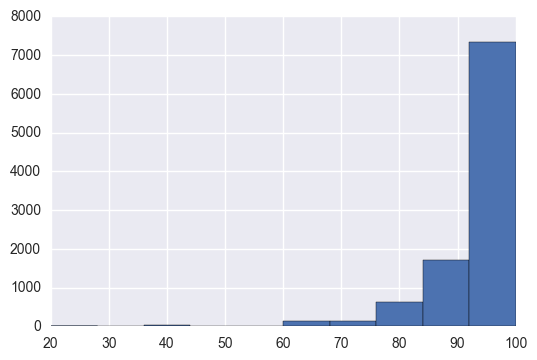

In [135]:
dfnew.review_scores_rating.hist()

In [7]:
lr = LinearRegression()
X = dfnew.iloc[:, 1:]
y = dfnew.iloc[:, 0]
lr.fit(X, y)
# Prints out the R^2 for the model against the full dataset
lr.score(X,y)

NameError: name 'dfnew' is not defined

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.72488828252553539

In [142]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [144]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [150]:
alpha = 0.1
enet = ElasticNet(alpha=alpha)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
print ("Predict score: ", y_pred_enet)
print ("Elastic Net Score: " , enet.score(X_test,y_test))

Predict score:  [ 96.48984204  86.02590551  91.76789099 ...,  93.93037867  99.30494456
  90.79617804]
Elastic Net Score:  0.729509201517


In [151]:
dfnew.corr()['review_scores_rating'].sort_values(ascending=False)

review_scores_rating                            1.000000
review_scores_value                             0.739558
review_scores_cleanliness                       0.707141
review_scores_accuracy                          0.652778
review_scores_communication                     0.604065
review_scores_checkin                           0.595861
review_scores_location                          0.465594
host_is_superhost                               0.157180
count_amenities                                 0.120064
amen_First Aid Kit                              0.104396
amen_Hair Dryer                                 0.097263
amen_Iron                                       0.095097
host_since                                      0.090579
amen_Carbon Monoxide Detector                   0.089949
amen_Indoor Fireplace                           0.088406
amen_TV                                         0.078584
price                                           0.078050
amen_Hangers                   

In [163]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.grid_search import RandomizedSearchCV

In [158]:
knn = KNeighborsClassifier(n_neighbors=20)

In [159]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [160]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [167]:
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=42)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.01170, std: 0.01656, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.00820, std: 0.01146, params: {'n_neighbors': 26, 'weights': 'distance'},
 mean: 0.01120, std: 0.01697, params: {'n_neighbors': 15, 'weights': 'uniform'},
 mean: 0.00700, std: 0.01079, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.01210, std: 0.01634, params: {'n_neighbors': 22, 'weights': 'uniform'},
 mean: 0.00360, std: 0.00420, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.01010, std: 0.01712, params: {'n_neighbors': 11, 'weights': 'uniform'},
 mean: 0.00820, std: 0.01150, params: {'n_neighbors': 29, 'weights': 'distance'},
 mean: 0.00980, std: 0.01638, params: {'n_neighbors': 10, 'weights': 'uniform'},
 mean: 0.01000, std: 0.01715, params: {'n_neighbors': 12, 'weights': 'uniform'}]

In [185]:
!conda upgrade scikit-learn

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/veenakumar/anaconda2:
#
scikit-learn              0.18.1              np111py27_0  


In [2]:
sklearn.__version__

'0.18.1'

In [1]:
import sklearn

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('/Users/veenakumar/ds/metis/metisgh/sf16_ds4/local/Projects/5Kojak/listings_10k_final.csv')

In [15]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [16]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
rf = RandomForestRegressor()
rf.fit(X, y)
rf.feature_importances_

array([  4.51804146e-01,   1.67214425e-02,   1.26827255e-01,
         2.17942299e-02,   1.23087576e-01,   3.17667411e-02,
         1.13255372e-02,   2.01300441e-02,   3.65048175e-03,
         3.20274000e-03,   2.62242243e-03,   1.81445177e-03,
         3.68365093e-03,   7.12359387e-03,   8.30422345e-03,
         3.03857272e-04,   1.73896587e-03,   1.15978379e-03,
         2.25476680e-03,   6.33932292e-03,   1.72714837e-02,
         2.52097433e-03,   2.05677941e-02,   2.19854429e-03,
         6.05327450e-03,   4.90177426e-03,   1.11189443e-02,
         7.44835442e-03,   9.76343535e-04,   1.33644366e-03,
         1.11483124e-03,   5.21404269e-04,   5.08833856e-04,
         1.05650359e-03,   7.94340772e-04,   6.08428072e-04,
         1.32131641e-03,   1.43339458e-03,   9.20773008e-04,
         1.19662301e-03,   8.90525990e-04,   1.34719352e-03,
         8.27069688e-04,   1.72393056e-03,   1.29315875e-03,
         1.19955374e-03,   6.09604636e-04,   5.45026787e-04,
         9.12569382e-04,

In [18]:
sorted(zip(rf.feature_importances_, df.columns),reverse=True)

[(0.45180414560857346, 'review_scores_rating'),
 (0.12682725527870586, 'number_of_reviews'),
 (0.12308757589231305, 'review_scores_checkin'),
 (0.031766741118190653, 'review_scores_cleanliness'),
 (0.021794229902536627, 'review_scores_accuracy'),
 (0.020567794084336923, 'host_total_listings_count'),
 (0.02013004406407156, 'review_scores_location'),
 (0.017271483740187978, 'host_response_rate'),
 (0.016721442455347978, 'review_scores_value'),
 (0.011325537211189785, 'review_scores_communication'),
 (0.011118944343028682, 'minimum_nights'),
 (0.008304223447318352, 'cleaning_fee'),
 (0.0074483544161556376, 'price'),
 (0.0071235938666085836, 'calculated_host_listings_count'),
 (0.0063393229214026387, 'host_listings_count'),
 (0.0060532744999461079, 'instant_bookable'),
 (0.0049017742635893268, 'maximum_nights'),
 (0.0036836509338272032, 'beds'),
 (0.0036504817452105488, 'reviews_per_month'),
 (0.0032027400045850246, 'accommodates'),
 (0.0026224224333395501, 'bathrooms'),
 (0.00252097432705

In [19]:
df.head()

,review_scores_rating,review_scores_value,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,accommodates,...,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0,zipcode_94301.0,zipcode_94401.0,zipcode_95131.0,zipcode_nan
0,97.0,10.0,49.0,10.0,10.0,10.0,10.0,10.0,0.59,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98.0,10.0,52.0,10.0,10.0,10.0,10.0,9.0,0.73,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.0,9.0,120.0,9.0,10.0,9.0,10.0,9.0,1.70,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,93.0,9.0,239.0,9.0,10.0,10.0,10.0,10.0,2.94,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88.0,9.0,37.0,10.0,9.0,9.0,10.0,9.0,0.42,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
